# Implementation of BoWs

- Author:      Johannes Maucher
- Last update: 01.11.2024

This notebook demonstrates how documents can be described in a vector space model. Applying this type of model

1. similarities between documents 
2. similarities between documents and a query 

can easily be calculated.

## Read documents from Newsfeed

In [5]:
#!pip install feedparser

In [6]:
import feedparser
feed='http://newsfeed.zeit.de/index'
newsliststring=[]

f=feedparser.parse(feed)
for e in f.entries:
  text=e.title+"\n"+e.description
  newsliststring.append(text)
  #print('\n---------------------------')  
  #print(text)

In [7]:
newsliststring

['Umwelt: Robben in Netzen verendet? Expertin sieht weitere Hinweise\n',
 'Ermittlungen: Mann wird auf Straße gefunden - und stirbt zwei Tage später\n',
 'Umfragen zur US-Wahl: Wer zieht ins Weiße Haus – Donald Trump oder Kamala Harris?\nDie Kandidaten liegen weiter nah beisammen, doch Trump erlangt die Führung in wichtigen Swing-States. Die Daten zum US-Wahlkampf im täglich aktualisierten Überblick',
 'Ampelstreit: Christian Lindner fordert Kehrtwende in Wirtschafts- und Finanzpolitik\nDer Bundesfinanzminister distanziert sich in einem Grundsatzpapier in Teilen von der Ampelregierung. Mit Blick auf den Bundeshaushalt fordert er weitere Einsparungen.',
 '3. Fußball-Liga: Wehen Wiesbaden mit Respekt vor Pokal-Schreck Bielefeld\n',
 'Hochschulen: Peter Bernshausen ist neuer Kanzler der TU Chemnitz\n',
 'Katargate: EU-Staatsanwaltschaft ermittelt gegen hohen Beamten wegen Korruption\nIn der EU laufen Ermittlungen gegen Henrik Hololei. Der estnische EU-Beamte steht unter Verdacht, teure Ge

## Tokenisation
In Keras methods for preprocessing texts are contained in `keras.preprocessing.text`. From this module, we apply the `Tokenizer`-class to 
* transform words to integers, i.e. generating a word-index
* represent texts as sequences of integers
* represent collections of texts in a Bag-of-Words (BOW)-matrix

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

Generate a `Tokenizer`-object and fit it on the given list of texts:

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(newsliststring)

The Tokenizer-class accepts a list of arguments, which can be configured at initialisation of a Tokenizer-object. The default-values are printed below

In [10]:
print("Configured maximum number of words in the vocabulary: ",tokenizer.num_words) #Maximum number of words to regard in the vocabulary
print("Configured filters: ",tokenizer.filters) #characters to ignore in tokenization
print("Map all characters to lower case: ",tokenizer.lower) #Mapping of characters to lower-case
print("Tokenizsation on character level: ",tokenizer.char_level) #whether tokens are words or characters

Configured maximum number of words in the vocabulary:  None
Configured filters:  !"#$%&()*+,-./:;<=>?@[\]^_`{|}~	

Map all characters to lower case:  True
Tokenizsation on character level:  False


In [11]:
print("Number of documents: ",tokenizer.document_count)
print("Number of words: ",len(tokenizer.word_index))

Number of documents:  15
Number of words:  228


In [12]:
print("Index of words: ",tokenizer.word_index)

Index of words:  {'der': 1, 'in': 2, 'die': 3, 'auf': 4, 'und': 5, 'trump': 6, 'vor': 7, 'us': 8, 'donald': 9, 'mit': 10, 'eu': 11, 'gegen': 12, 'könnte': 13, 'mehr': 14, 'als': 15, 'ukraine': 16, 'warnt': 17, 'weitere': 18, 'ermittlungen': 19, 'doch': 20, 'wahlkampf': 21, 'im': 22, 'fordert': 23, 'einem': 24, 'ist': 25, 'aus': 26, 'zu': 27, 'haben': 28, 'macht': 29, 'wie': 30, 'noch': 31, 'winter': 32, 'afd': 33, 'elbe': 34, 'liz': 35, 'cheney': 36, 'umwelt': 37, 'robben': 38, 'netzen': 39, 'verendet': 40, 'expertin': 41, 'sieht': 42, 'hinweise': 43, 'mann': 44, 'wird': 45, 'straße': 46, 'gefunden': 47, 'stirbt': 48, 'zwei': 49, 'tage': 50, 'später': 51, 'umfragen': 52, 'zur': 53, 'wahl': 54, 'wer': 55, 'zieht': 56, 'ins': 57, 'weiße': 58, 'haus': 59, '–': 60, 'oder': 61, 'kamala': 62, 'harris': 63, 'kandidaten': 64, 'liegen': 65, 'weiter': 66, 'nah': 67, 'beisammen': 68, 'erlangt': 69, 'führung': 70, 'wichtigen': 71, 'swing': 72, 'states': 73, 'daten': 74, 'zum': 75, 'täglich': 76, '

In [13]:
print("Number of docs, in which word appears: ",tokenizer.word_docs)

Number of docs, in which word appears:  defaultdict(<class 'int'>, {'in': 7, 'expertin': 1, 'netzen': 1, 'umwelt': 1, 'sieht': 1, 'weitere': 2, 'verendet': 1, 'hinweise': 1, 'robben': 1, 'mann': 1, 'zwei': 1, 'tage': 1, 'wird': 1, 'und': 4, 'auf': 5, 'ermittlungen': 2, 'später': 1, 'stirbt': 1, 'straße': 1, 'gefunden': 1, 'beisammen': 1, 'donald': 2, 'harris': 1, 'zur': 1, 'umfragen': 1, 'us': 2, 'überblick': 1, 'führung': 1, 'zum': 1, 'weiße': 1, 'liegen': 1, 'haus': 1, 'weiter': 1, 'wahlkampf': 2, 'erlangt': 1, 'nah': 1, 'trump': 2, 'wahl': 1, '–': 1, 'die': 4, 'states': 1, 'aktualisierten': 1, 'wichtigen': 1, 'oder': 1, 'täglich': 1, 'doch': 2, 'kamala': 1, 'wer': 1, 'zieht': 1, 'kandidaten': 1, 'daten': 1, 'ins': 1, 'swing': 1, 'im': 2, 'kehrtwende': 1, 'finanzpolitik': 1, 'ampelregierung': 1, 'christian': 1, 'lindner': 1, 'bundesfinanzminister': 1, 'grundsatzpapier': 1, 'den': 1, 'sich': 1, 'einsparungen': 1, 'mit': 3, 'distanziert': 1, 'der': 6, 'wirtschafts': 1, 'fordert': 1, 'b

In [14]:
textSeqs=tokenizer.texts_to_sequences(newsliststring)
for i,ts in enumerate(textSeqs):
    print("text %d sequence: "%i,ts)

text 0 sequence:  [37, 38, 2, 39, 40, 41, 42, 18, 43]
text 1 sequence:  [19, 44, 45, 4, 46, 47, 5, 48, 49, 50, 51]
text 2 sequence:  [52, 53, 8, 54, 55, 56, 57, 58, 59, 60, 9, 6, 61, 62, 63, 3, 64, 65, 66, 67, 68, 20, 6, 69, 3, 70, 2, 71, 72, 73, 3, 74, 75, 8, 21, 22, 76, 77, 78]
text 3 sequence:  [79, 80, 81, 23, 82, 2, 83, 5, 84, 1, 85, 86, 87, 2, 24, 88, 2, 89, 90, 1, 91, 10, 92, 4, 93, 94, 23, 95, 18, 96]
text 4 sequence:  [97, 98, 99, 100, 101, 10, 102, 7, 103, 104, 105]
text 5 sequence:  [106, 107, 108, 25, 109, 110, 1, 111, 112]
text 6 sequence:  [113, 11, 114, 115, 12, 116, 117, 118, 119, 2, 1, 11, 120, 19, 12, 121, 122, 1, 123, 11, 124, 125, 126, 127, 128, 129, 26, 130, 131, 27, 28]
text 7 sequence:  [132, 133, 134, 135, 136, 137, 138, 4, 139]
text 8 sequence:  [140, 141, 142, 143, 144, 145, 29, 2, 1, 146, 147, 148, 149, 150, 30, 151, 152, 153, 31, 154, 20, 1, 155, 13, 26, 156, 157, 158, 159, 160, 161]
text 9 sequence:  [162, 163, 164, 165, 14, 15, 166, 167, 168, 28]
text 10 s

## Represent text-collection as BoW:
A Bag-Of-Words representation of documents contains $N$ rows and $|V|$ columns, where $N$ is the number of documents in the collection and $|V|$ is the size of the vocabulary, i.e. the number of different words in the entire document collection.

The entry $x_{i,j}$ of the BoW-Matrix indicates the **relevance of word $j$ in document $i$**.

In this lecture 3 different types of **word-relevance** are considered:

1. **Binary BoW:** Entry $x_{i,j}$ is *1* if word $j$ appears in document $i$, otherwise 0.
2. **Count-based BoW:** Entry $x_{i,j}$ is the frequency of word $j$ in document $i$.
3. **Tf-idf-based BoW:** Entry $x_{i,j}$ is the tf-idf of word $j$ with respect to document $i$.

The BoW-representation of texts is a common input to conventional Machine Learning algorithms (not Neural Netorks like CNN and RNN).

### Binary BoW

In [15]:
bow_representation_bin = tokenizer.texts_to_matrix(newsliststring)
print(bow_representation_bin.shape)
print(bow_representation_bin)

(15, 229)
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


### Count-based BoW
Represent text-collection as BoW with word-counts:

In [16]:
bow_representation_count = tokenizer.texts_to_matrix(newsliststring,mode="count")
print(bow_representation_count.shape)
print(bow_representation_count)

(15, 229)
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


### Tf-idf-based BoW
In the BoW representation above the term frequency (tf) has been applied. This value measures how often the term (word) appears in the document. If document similarity is calculated on such tf-based BoW representation, common words which appear quite often (in many documents) but have low semantic focus, have a strong impact on the similarity-value. In most cases this is a drawback, since similarity should be based on terms with a high semantic focus. Such semantically meaningful words usually appear only in a few documents. The term frequency inversed document frequency measure (tf-idf) does not only count the frequency of a term in a document, but weighs those terms stronger, which occur only in a few documents of the corpus.

In [17]:
bow_representation_idf = tokenizer.texts_to_matrix(newsliststring,mode="tfidf")
print(bow_representation_idf.shape)
print(bow_representation_idf)

(15, 229)
[[0.         0.         1.05605267 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.05605267 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.05605267 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 2.14006616 2.14006616 2.14006616]]


## Analyse Similarities
For each document the most similar document is calculated from the 
* binary
* count
* tf-idf
BoW-matrix.

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def most_similar_rows(bow_representation):
    similarities = cosine_similarity(bow_representation)
    np.fill_diagonal(similarities, 0)  # Ignore self-similarity
    most_similar = np.argmax(similarities, axis=1)
    return most_similar

most_similar_bin = most_similar_rows(bow_representation_bin)
print("From Binary BoW: \t:",most_similar_bin)
most_similar_count = most_similar_rows(bow_representation_count)
print("From Count BoW: \t:",most_similar_count)
most_similar_idf = most_similar_rows(bow_representation_idf)
print("From tf-idf BoW: \t:",most_similar_idf)

From Binary BoW: 	: [ 3  3 14 11 11 10  8 11 10 12  8  4  9  0 11]
From Count BoW: 	: [ 3  7 14 10 11 10  3  1 10 12  3 14  9  3  2]
From tf-idf BoW: 	: [ 3  3 14 11 11 10  8 11 10 12  8 14  9  3  2]


Plot each document and the corresponding most similar document, calculated from the tf-idf Bow:

In [19]:
for i in range(len(newsliststring)):
    print("-"*30)
    print("Most similar news to news %d: "%i,most_similar_bin[i],most_similar_count[i],most_similar_idf[i])
    print(newsliststring[i])
    print(newsliststring[most_similar_idf[i]])

------------------------------
Most similar news to news 0:  3 3 3
Umwelt: Robben in Netzen verendet? Expertin sieht weitere Hinweise

Ampelstreit: Christian Lindner fordert Kehrtwende in Wirtschafts- und Finanzpolitik
Der Bundesfinanzminister distanziert sich in einem Grundsatzpapier in Teilen von der Ampelregierung. Mit Blick auf den Bundeshaushalt fordert er weitere Einsparungen.
------------------------------
Most similar news to news 1:  3 7 3
Ermittlungen: Mann wird auf Straße gefunden - und stirbt zwei Tage später

Ampelstreit: Christian Lindner fordert Kehrtwende in Wirtschafts- und Finanzpolitik
Der Bundesfinanzminister distanziert sich in einem Grundsatzpapier in Teilen von der Ampelregierung. Mit Blick auf den Bundeshaushalt fordert er weitere Einsparungen.
------------------------------
Most similar news to news 2:  14 14 14
Umfragen zur US-Wahl: Wer zieht ins Weiße Haus – Donald Trump oder Kamala Harris?
Die Kandidaten liegen weiter nah beisammen, doch Trump erlangt die Fü

In [20]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np

In [26]:
tsneModel=TSNE(n_components=2,random_state=0,perplexity=12,metric="cosine")
np.set_printoptions(suppress=True)
model2d=tsneModel.fit_transform(bow_representation_idf)

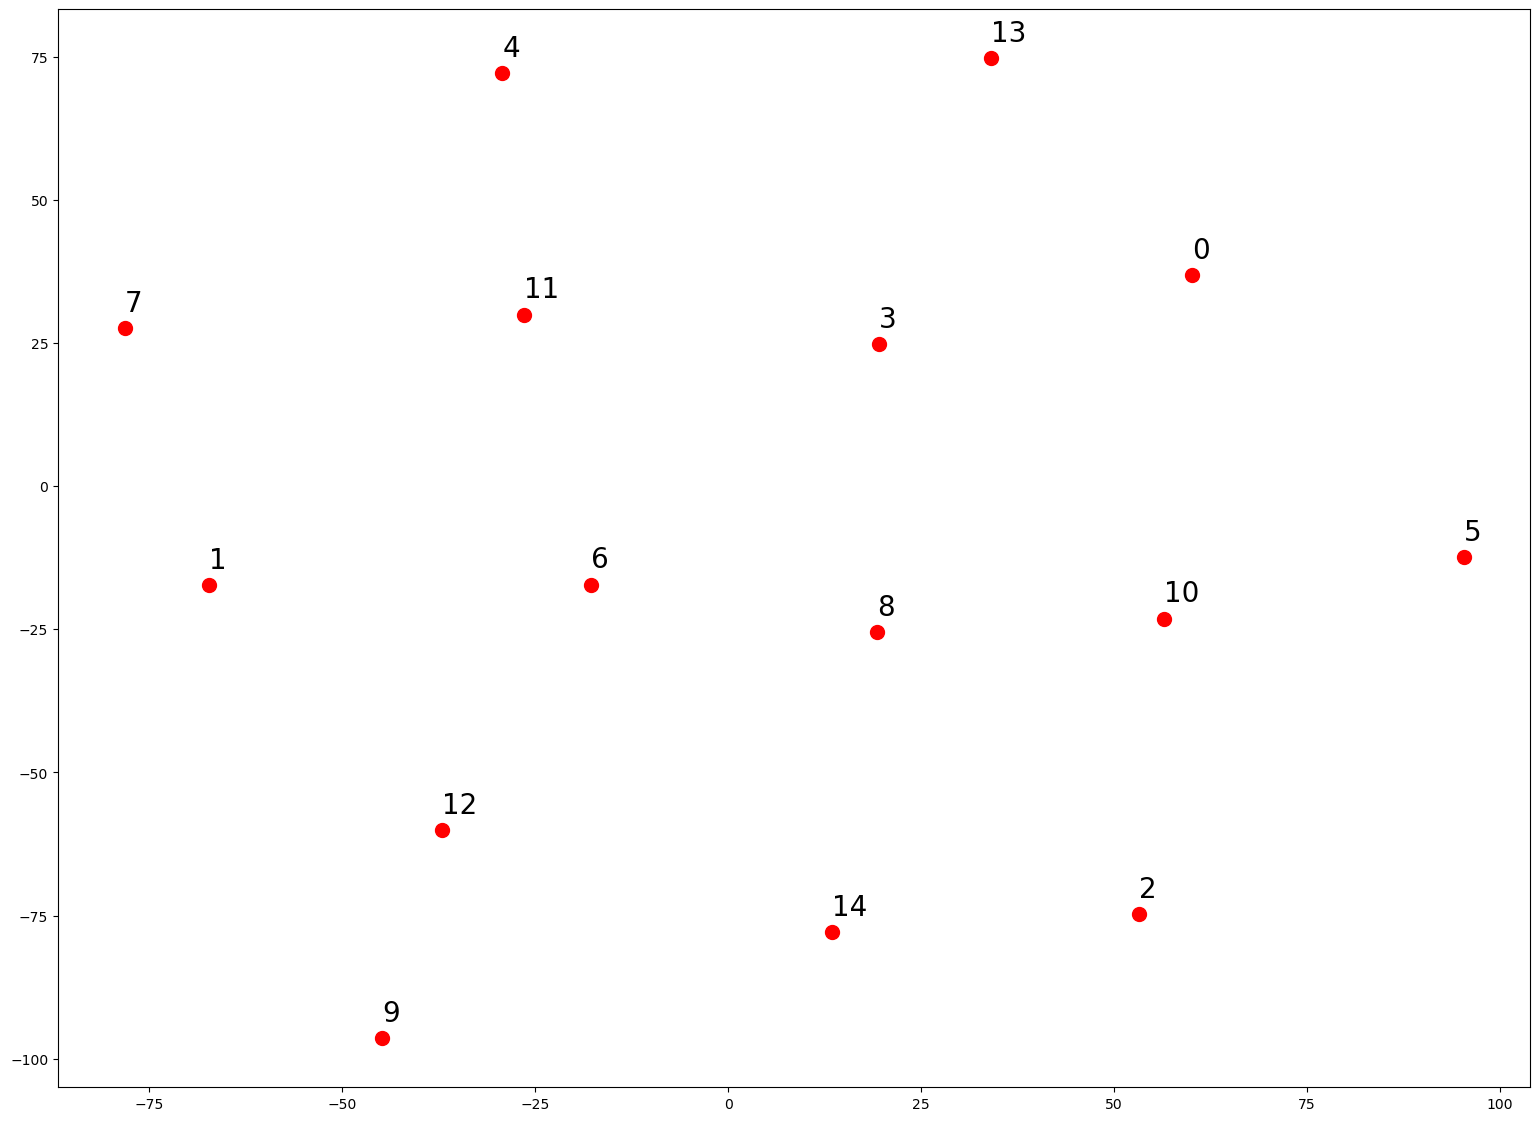

In [30]:
plt.figure(figsize=(19,14))
idx=0
for a in model2d:
    w=bow_representation_idf[idx]
    plt.plot(a[0],a[1],'r.',markersize=20)
    plt.text(a[0],a[1]+3,idx,size=20)
    idx+=1
plt.show()